# Example 1
This will be a simple example of loading some data and using the package to fit a model from spec to ELBO

Import libraries

In [1]:
import dill as pickle
import numpy as np
from controllers import simulator as sim
from controllers import JaxMod as jm
from controllers import utils as ut
import matplotlib.pyplot as plt
import jax.numpy as jnp
import matplotlib
# matplotlib.use('TkAgg')
%matplotlib inline


Load monkey test data

In [2]:
datum='/Users/user/PycharmProjects/ControllerModeling/controllers/testdata/nhpdata.pkl'
ff = open(datum, 'rb')
dat = pickle.load(ff)

In [3]:
#Get sim specs but update for exmamples
cfgparams=ut.generate_sim_defaults()

#let's increase the nnumber of radial basis functions. Since we want accuracy and regularization takes care of smoothing
cfgparams['rbfs']=30 
cfgparams['lambda_reg']=3
#pick a subject and session, but doesnt matter for example (to update cfgparams['subject']='H',cfgparams['session']=2)
Xdsgn = dat[cfgparams['subject']][cfgparams['session']]

#just use one trial
cfgparams['trials']=1

#pick a random session trial
trialidx = np.sort(np.random.choice(np.arange(1, len(Xdsgn)), size=cfgparams['trials'], replace=False))

#get training data organized from trial
tdat = ut.trial_grab_kine(Xdsgn, trialidx[0])

Plot some of the trial data

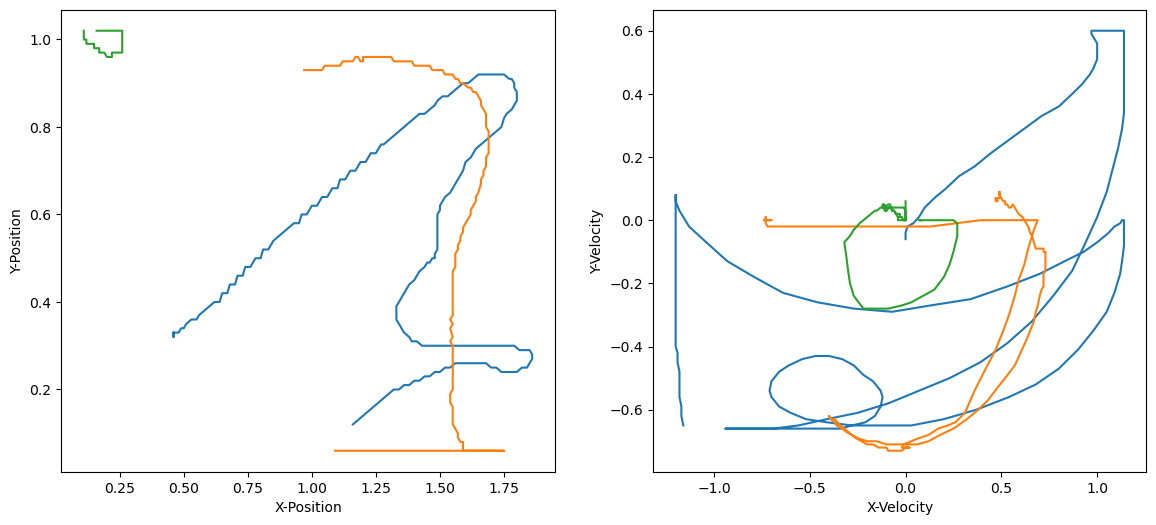

In [4]:
fig, axs = plt.subplots(2,2,figsize=(14,6))
fig.subplots_adjust(hspace=1)  # Increase vertical spacing

axs[0,0].plot(tdat['player_pos'][:,0],tdat['player_pos'][:,1])
axs[0,0].plot(tdat['pry1_pos'][:,0],tdat['pry1_pos'][:,1])
axs[0,0].plot(tdat['pry2_pos'][:,0],tdat['pry2_pos'][:,1])
axs[0,0].set_ylabel('Y-Position')
axs[0,0].set_xlabel('X-Position')

axs[0,1].plot(tdat['player_vel'][:,0],tdat['player_vel'][:,1])
axs[0,1].plot(tdat['pry1_vel'][:,0],tdat['pry1_vel'][:,1])
axs[0,1].plot(tdat['pry2_vel'][:,0],tdat['pry2_vel'][:,1])
axs[0,1].set_ylabel('Y-Velocity')
axs[0,1].set_xlabel('X-Velocity')

axs[1,0].plot(np.sum(((tdat['player_pos']-tdat['pry1_pos'])**2),axis=1)**0.5,color='#FF7F0E')
axs[1,0].plot(np.sum(((tdat['player_pos']-tdat['pry2_pos'])**2),axis=1)**0.5,color='#2CA02C')
axs[1,0].set_ylabel('player prey distance')
axs[1,0].set_xlabel('time (samples)')

axs[1,1].plot(np.sum(((tdat['player_vel']-tdat['pry1_vel'])**2),axis=1)**0.5,color='#FF7F0E')
axs[1,1].plot(np.sum(((tdat['player_vel']-tdat['pry2_vel'])**2),axis=1)**0.5,color='#2CA02C')
axs[1,1].set_ylabel('player prey rel. velocity')
axs[1,1].set_xlabel('time (samples)')
plt.show()

### Lets setup a model fit
1. We will choose 1 model type (e.g., 'pvi')
2. These are stochastic starts, so multiple runs is healthy


In [ ]:
modidx=3
modname='pvi'
#generate gains
L1, L2 = ut.generate_sim_gains(cfgparams['ngains'][modidx])
L1= L1 * 1.0
L2= L2 * 1.0

# Make the simulated swtcthing function complexish 
# (gpscaler =1 will be simple and gpscaler =0.1 will be almost constant without switch)
gpscaler = 3

#Simulate testdata
if modname == 'p':
    outputs = sim.controller_sim_p(tdat, 6, L1, L2, A=None, B=None, gpscaler=gpscaler)
elif modname == 'pv':
    outputs = sim.controller_sim_pv(tdat, 6, L1, L2, A=None, B=None, gpscaler=gpscaler)
elif modname == 'pf':
    outputs = sim.controller_sim_pf(tdat, 6, L1, L2, A=None, B=None, gpscaler=gpscaler)
elif modname == 'pvi':
    outputs = sim.controller_sim_pvi(tdat, 6, L1, L2, A=None, B=None, gpscaler=gpscaler)
elif modname == 'pif':
    outputs = sim.controller_sim_pif(tdat, 6, L1, L2, A=None, B=None, gpscaler=gpscaler)
elif modname == 'pvf':
    outputs = sim.controller_sim_pvf(tdat, 6, L1, L2, A=None, B=None, gpscaler=gpscaler)
elif modname == 'pvif':
    outputs = sim.controller_sim_pvif(tdat, 6, L1, L2, A=None, B=None, gpscaler=gpscaler)

tdat['player_pos']=outputs['x'][:,:2]
tdat['player_vel']=outputs['x'][:,2:]

# Make time
tmp = ut.make_timeline(outputs)


Plot simulations with original prey action, but with a simulated  controler

In [ ]:
fig, axs = plt.subplots(2,3,figsize=(14,6))
# fig.subplots_adjust(wspace=0.5,hspace=0.5)  # Increase vertical spacing

axs[0,0].plot(tdat['player_pos'][:,0],tdat['player_pos'][:,1])
axs[0,0].plot(tdat['pry1_pos'][:,0],tdat['pry1_pos'][:,1])
axs[0,0].plot(tdat['pry2_pos'][:,0],tdat['pry2_pos'][:,1])
axs[0,0].set_ylabel('Y-Position')
axs[0,0].set_xlabel('X-Position')

axs[0,1].plot(tdat['player_vel'][:,0],tdat['player_vel'][:,1])
axs[0,1].plot(tdat['pry1_vel'][:,0],tdat['pry1_vel'][:,1])
axs[0,1].plot(tdat['pry2_vel'][:,0],tdat['pry2_vel'][:,1])
axs[0,1].set_ylabel('Y-Velocity')
axs[0,1].set_xlabel('X-Velocity')

axs[1,0].plot(np.sum(((tdat['player_pos']-tdat['pry1_pos'])**2),axis=1)**0.5,color='#FF7F0E')
axs[1,0].plot(np.sum(((tdat['player_pos']-tdat['pry2_pos'])**2),axis=1)**0.5,color='#2CA02C')
axs[1,0].set_ylabel('player prey distance')
axs[1,0].set_xlabel('time (samples)')

axs[1,1].plot(np.sum(((tdat['player_vel']-tdat['pry1_vel'])**2),axis=1)**0.5,color='#FF7F0E')
axs[1,1].plot(np.sum(((tdat['player_vel']-tdat['pry2_vel'])**2),axis=1)**0.5,color='#2CA02C')
axs[1,1].set_ylabel('player prey rel. velocity')
axs[1,1].set_xlabel('time (samples)')

axs[0,2].plot(outputs['shift'][0,:])
axs[0,2].set_ylabel('mixing function (1= target 1 at 100%)')
axs[0,2].set_xlabel('time (samples)')

axs[1,2].plot(outputs['uout'])
axs[1,2].set_ylabel('control action of contorller (accel)')
axs[1,2].set_xlabel('time (samples)')
plt.tight_layout()
plt.show()

Here is all the real code for model fitting
You can always switch optimizer from 'lbfgs' to 'trust' sometimes it works better

In [ ]:
#Prep inputs 😃
# Get system parameters
A, B = ut.define_system_parameters(decay_term=0) #leave decay at zero
inputs = ut.prepare_inputs(A, B, outputs['x'], outputs['uout'], tdat['pry1_pos'], tdat['pry2_pos'], tmp, cfgparams['rbfs'],outputs['x'][:, 2:], tdat['pry1_vel'], tdat['pry2_vel'], pry_1_accel=tdat['pry1_accel'],
                           pry_2_accel=tdat['pry2_accel'])

# Running models
#step 1: define the loss function
loss_function = jm.create_loss_function_inner_bayes(ut.generate_rbf_basis, cfgparams['rbfs'],
                                                    ut.generate_smoothing_penalty,
                                                    lambda_reg=cfgparams[
                                                        'lambda_reg'],
                                                    ctrltype=modname,
                                                    use_gmf_prior=True,
                                                    prior_std=cfgparams[
                                                        'prior_std'])

# step 2: Compute jacobian
grad_loss = ut.compute_loss_gradient(loss_function)

# step 3: Compute hessian
hess_loss = ut.compute_hessian(loss_function)

#Step 4: do the optimiztion and fit to testdata
params, best_params_flat, best_loss = jm.outer_optimization_lbfgs(inputs,
                                                                  loss_function,
                                                                  grad_loss,
                                                                  hess_loss,
                                                                  randomize_weights=True,
                                                                  ctrltype=modname,
                                                                  maxiter=5000,
                                                                  tolerance=1e-5,
                                                                  optimizer=cfgparams['optimizer'],
                                                                  slack_model=
                                                                  cfgparams[
                                                                      'slack'],
                                                                  bayes=True)

# Now we start bayesian model selections and comparison using the ELBO through monte carlo sampling
prior_hessian = jm.compute_prior_hessian(prior_std=cfgparams['prior_std'],
                                         lambda_reg=cfgparams['lambda_reg'],
                                         num_weights=cfgparams['rbfs'],
                                         num_gains=2 * cfgparams['ngains'][modidx],
                                         smoothing_matrix=ut.generate_smoothing_penalty(
                                             cfgparams['rbfs']))

cov_matrix = jm.compute_posterior_covariance(hess_loss, best_params_flat, inputs,
                                             prior_hessian)

controller_trajectories = jm.simulate_posterior_samples(best_params_flat,
                                                        cov_matrix,
                                                        inputs)

# Compute the elbo
elbo = jm.compute_elbo(cfgparams['prior_std'], best_params_flat, cov_matrix, inputs,
                       modname,
                       num_samples=cfgparams['elbo_samples'])

#Get parameters
weights = params[2]
width = jnp.log(1 + jnp.exp(params[3]))
# transform paramteres to correct domain
L1_fit = np.array(jnp.log(1 + jnp.exp(params[0])))
L2_fit = np.array(jnp.log(1 + jnp.exp(params[1])))

wtsim = ut.generate_sim_switch(inputs, width, weights,slack_model=cfgparams['slack'])
shift = np.stack(wtsim)

# Simulate testdata for prediction testing
if modname == 'p':
    output_pred = sim.controller_sim_p_post(tdat, shift, L1_fit, L2_fit, A=None,
                                            B=None)
elif modname == 'pv':
    output_pred = sim.controller_sim_pv_post(tdat, shift, L1_fit, L2_fit,
                                             A=None, B=None)
elif modname == 'pf':
    output_pred = sim.controller_sim_pf_post(tdat, shift, L1_fit, L2_fit,
                                             A=None, B=None)
elif modname == 'pvi':
    output_pred = sim.controller_sim_pvi_post(tdat, shift, L1_fit, L2_fit,
                                              A=None, B=None)
elif modname == 'pif':
    output_pred = sim.controller_sim_pif_post(tdat, shift, L1_fit, L2_fit,
                                              A=None, B=None)
elif modname == 'pvf':
    output_pred = sim.controller_sim_pvf_post(tdat, shift, L1_fit, L2_fit,
                                              A=None, B=None)
elif modname == 'pvif':
    output_pred = sim.controller_sim_pvif_post(tdat, shift, L1_fit, L2_fit,
                                               A=None, B=None)

## We computed the ELBO above to asess model fit
$$
ELBO(\phi) <= log(p(y))
$$

We take monte carlo estimates to compute:
$$
\text{ELBO} \approx \frac{1}{S} \sum_{s=1}^{S} \left[ \log p(y \mid \theta^{(s)}) + \log p(\theta^{(s)}) - \log q(\theta^{(s)}) \right] 
+ \frac{1}{2} \log |\Sigma| - \frac{D}{2} \log(2\pi)
$$


- Let $ \boldsymbol{\theta} $ be the parameter vector (includes weights, widths, and gains).

- $ q(\boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\theta}_{\text{MAP}}, \Sigma) $ is the Laplace posterior (a Gaussian with MAP mean and Hessian-inverse covariance).

- $ \log p(\boldsymbol{y} \mid \boldsymbol{\theta}) $ is the log-likelihood (computed via the loss function).

- $ \log p(\boldsymbol{\theta}) = \log p(\text{weights}) + \log p(\text{widths}) + \log p(\text{gains}) $ is the prior log-probability.

- $ \log q(\boldsymbol{\theta}) $ is the log-probability under the Gaussian posterior.

## An ELBO closer to 0 is a better model fit

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
fig.subplots_adjust(wspace=0.5,hspace=0.5)  # Increase vertical spacing
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

corr = np.corrcoef(np.hstack([tdat['player_pos'][:,0],tdat['player_pos'][:,1]]),np.hstack([output_pred['x'][:,0],output_pred['x'][:,1]]))[0,1]
axs[0].plot(tdat['player_pos'][:,0],tdat['player_pos'][:,1])
axs[0].plot(output_pred['x'][:,0],output_pred['x'][:,1],'--')
axs[0].set_ylabel('Y-Position')
axs[0].set_xlabel('X-Position')
plt.legend(['simulated','predicted'])
# place a text box in upper left in axes coords
axs[0].text(0.05, 0.95, f'corr ={np.round(np.max(corr),2)} ', transform=axs[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

corr=np.array([np.corrcoef(outputs['shift'][0,:],shift[0,:])[0,1],np.corrcoef(outputs['shift'][0,:],shift[1,:])[0,1]])
axs[1].plot(outputs['shift'][0,:])
axs[1].plot(shift[np.argmax(corr),:],'--')
axs[1].set_ylabel('mixture weight')
axs[1].set_xlabel('time(samples)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs[1].text(0.05, 0.95, f'corr ={np.round(np.max(corr),2)} ', transform=axs[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.tight_layout()
plt.show()